Прогнозирование временного ряда на примере решения задачи прогнозирования стоимости акций компании APPLE

Ключевые пункты:
* учет тренда и сезонности временного ряда стоимости 
* учет дополнительных параметров при прогнозировании - объем, уровни, волны
* учет возможной волатильности временного ряда
* анализ возможных рисков при соверешении операций с ценными бумагами
* использование разработанного инструмента для анализа различных акций и тд.

Методы для предсказания:
* ARIMA и т.д
* Преобразование Фурье
* Нейронные сети 
* Цепи Маркова


План диплома


Todo: 
* логарифмирование исходного ряда
* попробовать SARIMAX с дополнительными параметрами
* нейронные сети для анализа ряда 

# Эксперимент #3. Прогнозирование при помощи рекуррентных нейронных сетей

In [7]:
a = 'None'
if a:
    print(a)
else:
    print('not a')

None


In [1]:
231.775 * 2

463.55

In [2]:
18.25 * 25.4

463.54999999999995

In [8]:
a = None
b = a or "some"

print(a)
print(b)

None
some


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import yfinance as yf
import warnings

from datetime import datetime
from ta import add_all_ta_features
from ta.utils import dropna
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

import tensorflow as tf

import plotly.graph_objects as go

In [10]:
# pip install tensorflow

In [11]:
# Получение котировок акций Apple
# data = ek.get_timeseries('AAPL.0', fields='*', 
#                          start_date='2018-10-18 16:00:00', 
#                          end_date='2018-10-18 17:00:00', 
#                          interval='tick')

# data.info()

# #1.0 Загрузка и анализ исходных даных
### #1.1 Загрузка данных и разбиение на train/test

In [12]:
# Часовой график
# apple_df_tmp = yf.download("AAPL", start="2022-01-03", interval='1h') #.to_csv('data/test.csv')
# apple_df_tmp.head()

In [13]:
apple_df = pd.read_csv('data/AAPL_20060101-20230131.csv', parse_dates=["Date"], index_col=["Date"])

# apple_df = yf.download("AAPL", start="2006-01-03", end="2023-01-30")
# apple_df = yf.download("AAPL", start="2006-01-03", interval='1d') #.to_csv('data/test.csv')

apple_df.head()

# apple_df = pd.read_csv('data/test.csv') #, parse_dates=["Date"], index_col=["Date"])

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,2.585000,2.669643,2.580357,2.669643,2.275651,807234400
2006-01-04,2.683214,2.713571,2.660714,2.677500,2.282349,619603600
2006-01-05,2.672500,2.675000,2.633929,2.656429,2.264388,449422400
2006-01-06,2.687500,2.739286,2.662500,2.725000,2.322838,704457600
2006-01-09,2.740357,2.757143,2.705000,2.716071,2.315227,675040800


#### Логарифмирование ряда - ???

In [14]:
# apple_df['Close'] = np.log(apple_df['Close'])

#### Разбиение на train/test

In [15]:
# Разбиение на тренировочную и тестовую выборки
train_df = apple_df.loc[:'2022-07-29'] #apple_df.iloc[:-3]
test_df = apple_df.loc['2022-08-01':] #apple_df.iloc[-3:]

train_df.shape, test_df.shape

((4172, 6), (126, 6))

##### Разбиение данных (k-fold) - ????
Разбиение может проводится, например, следующим образом: 
30 дней обучение, 5 дней - прогноз 

# #2.0 Составление модели прогнозирования на основе ИНС
### #2.1 Стандартизация данных

In [16]:
train_close_mean = train_df['Close'].mean()
train_close_std = train_df['Close'].std()

print(train_close_mean)
print(train_close_std)

37.453729372483224
42.96689539438329


In [17]:
train_df['Close_stand'] = (train_df['Close'] - train_close_mean) / train_close_std

train_df.head()

C:\Users\b.ostreshko\AppData\Local\Temp\ipykernel_1776\3930516961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Close_stand'] = (train_df['Close'] - train_close_mean) / train_close_std


,Open,High,Low,Close,Adj Close,Volume,Close_stand
Date,,,,,,,
2006-01-03,2.585000,2.669643,2.580357,2.669643,2.275651,807234400,-0.809555
2006-01-04,2.683214,2.713571,2.660714,2.677500,2.282349,619603600,-0.809373
2006-01-05,2.672500,2.675000,2.633929,2.656429,2.264388,449422400,-0.809863
2006-01-06,2.687500,2.739286,2.662500,2.725000,2.322838,704457600,-0.808267
2006-01-09,2.740357,2.757143,2.705000,2.716071,2.315227,675040800,-0.808475


In [18]:
train_df['Close_stand'].hist()

<AxesSubplot:>

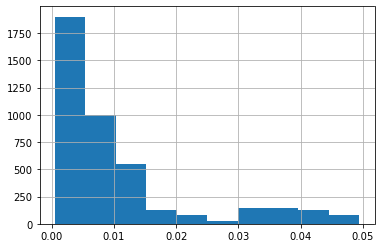

In [ ]:
pd.Series(tf.keras.utils.normalize(np.array(train_df['Close']))[0]).hist()

In [ ]:
len(tf.keras.utils.normalize(np.array(train_df['Close']))[0])

4172

c:\Users\b.ostreshko\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

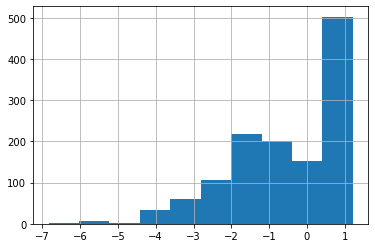

In [ ]:
np.log(train_df['Close_stand']).hist()

# Тестирование классов

In [1]:
from InitialDataPreparation import StockPrices, ARIMAclsModels

In [2]:
apple_ticket = StockPrices(path='data/AAPL_20060101-20230131.csv')
apple_ticket.df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,2.585000,2.669643,2.580357,2.669643,2.275651,807234400
2006-01-04,2.683214,2.713571,2.660714,2.677500,2.282349,619603600
2006-01-05,2.672500,2.675000,2.633929,2.656429,2.264388,449422400
2006-01-06,2.687500,2.739286,2.662500,2.725000,2.322838,704457600
2006-01-09,2.740357,2.757143,2.705000,2.716071,2.315227,675040800
...,...,...,...,...,...,...
2023-01-24,140.309998,143.160004,140.300003,142.529999,142.529999,66435100
2023-01-25,140.889999,142.429993,138.809998,141.860001,141.860001,65799300
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.960007,54105100


In [2]:
arima_model = ARIMAclsModels(path='data/AAPL_20060101-20230131.csv')
arima_model.df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,2.585000,2.669643,2.580357,2.669643,2.275651,807234400
2006-01-04,2.683214,2.713571,2.660714,2.677500,2.282349,619603600
2006-01-05,2.672500,2.675000,2.633929,2.656429,2.264388,449422400
2006-01-06,2.687500,2.739286,2.662500,2.725000,2.322838,704457600
2006-01-09,2.740357,2.757143,2.705000,2.716071,2.315227,675040800
...,...,...,...,...,...,...
2023-01-24,140.309998,143.160004,140.300003,142.529999,142.529999,66435100
2023-01-25,140.889999,142.429993,138.809998,141.860001,141.860001,65799300
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.960007,54105100


c:\Users\b.ostreshko\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


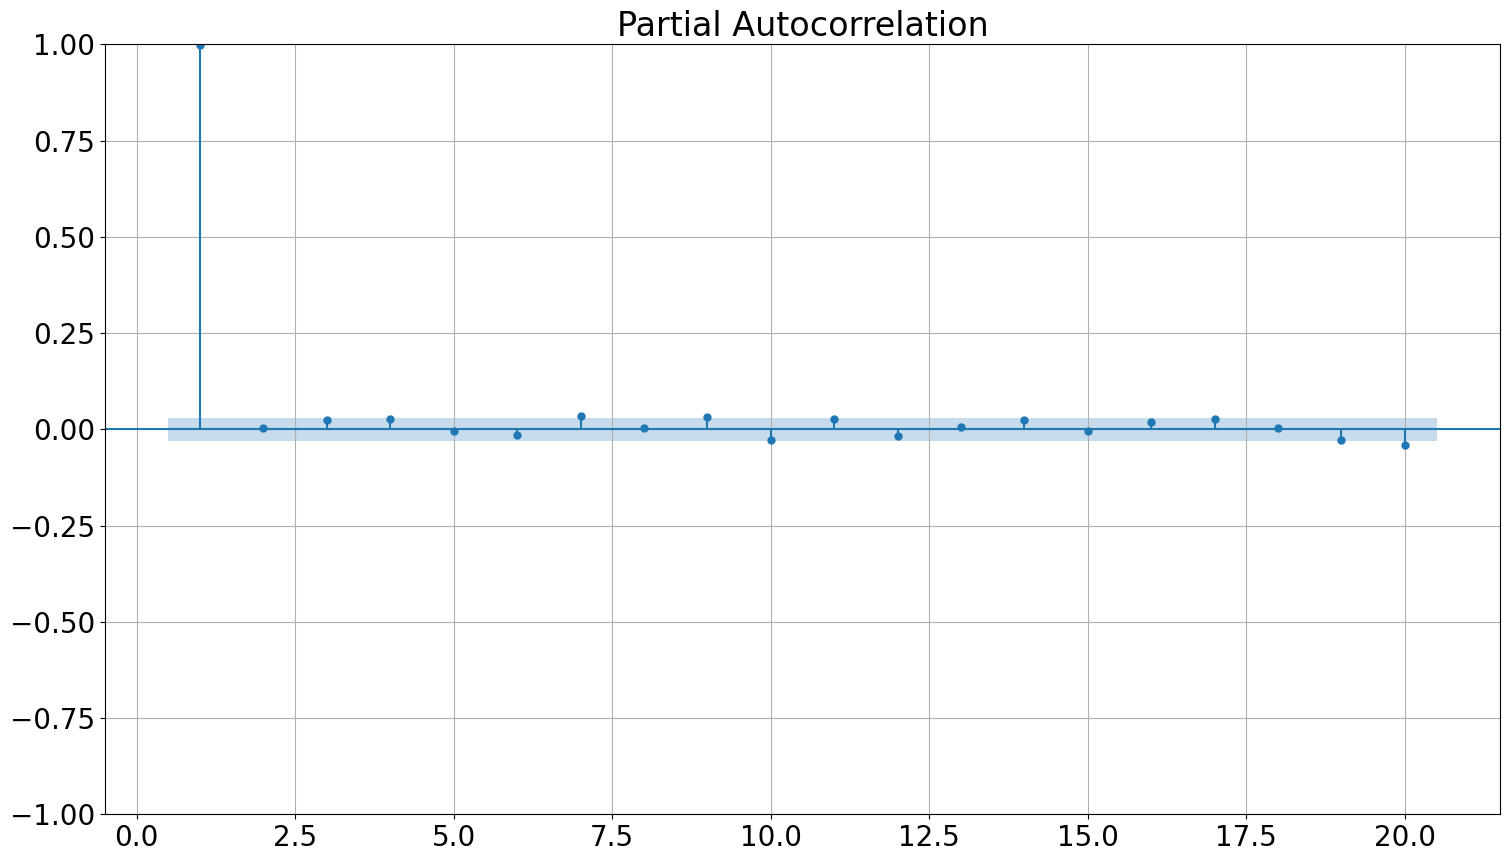

In [4]:
arima_model.plt_pacf("Close")

In [5]:
train_df = arima_model.df.iloc[100:200]['Close']
test_df = arima_model.df.iloc[201:211]['Close']
test_df

Date
2006-10-19    2.821071
2006-10-20    2.855357
2006-10-23    2.909286
2006-10-24    2.894643
2006-10-25    2.917143
2006-10-26    2.935357
2006-10-27    2.871786
2006-10-30    2.872143
2006-10-31    2.895714
2006-11-01    2.827143
Name: Close, dtype: float64

In [6]:
arima_model.arima_predict_df(train_df, test_df, p=2, d=2, q=2)
# arima_model.df

Критерий Акаике для p=2, d=2, q=2: -283.6270306624949


,model_preds,lower Close,upper Close
Date,,,
2006-10-19,2.654488,2.550535,2.758441
2006-10-20,2.665649,2.520897,2.810401
2006-10-23,2.663371,2.490377,2.836365
2006-10-24,2.672436,2.471302,2.873570
2006-10-25,2.672466,2.448744,2.896188
2006-10-26,2.679625,2.433173,2.926077
2006-10-27,2.681167,2.414888,2.947447
2006-10-30,2.687134,2.401067,2.973200
2006-10-31,2.689616,2.385468,2.993764


In [7]:
arima_model.sarima_predict_df(train_df, test_df)

Критерий Акаике для pdq=(1, 1, 1), PDQs=(1, 1, 1, 5): -259.79514998392284


,model_preds,lower Close,upper Close
Date,,,
2006-10-19,2.656704,2.548178,2.765231
2006-10-20,2.670818,2.520281,2.821356
2006-10-23,2.667847,2.484583,2.851111
2006-10-24,2.683070,2.472101,2.894039
2006-10-25,2.677054,2.441618,2.912490
2006-10-26,2.679823,2.416020,2.943627
2006-10-27,2.692596,2.403455,2.981737
2006-10-30,2.689757,2.377317,3.002197
2006-10-31,2.705019,2.370901,3.039138


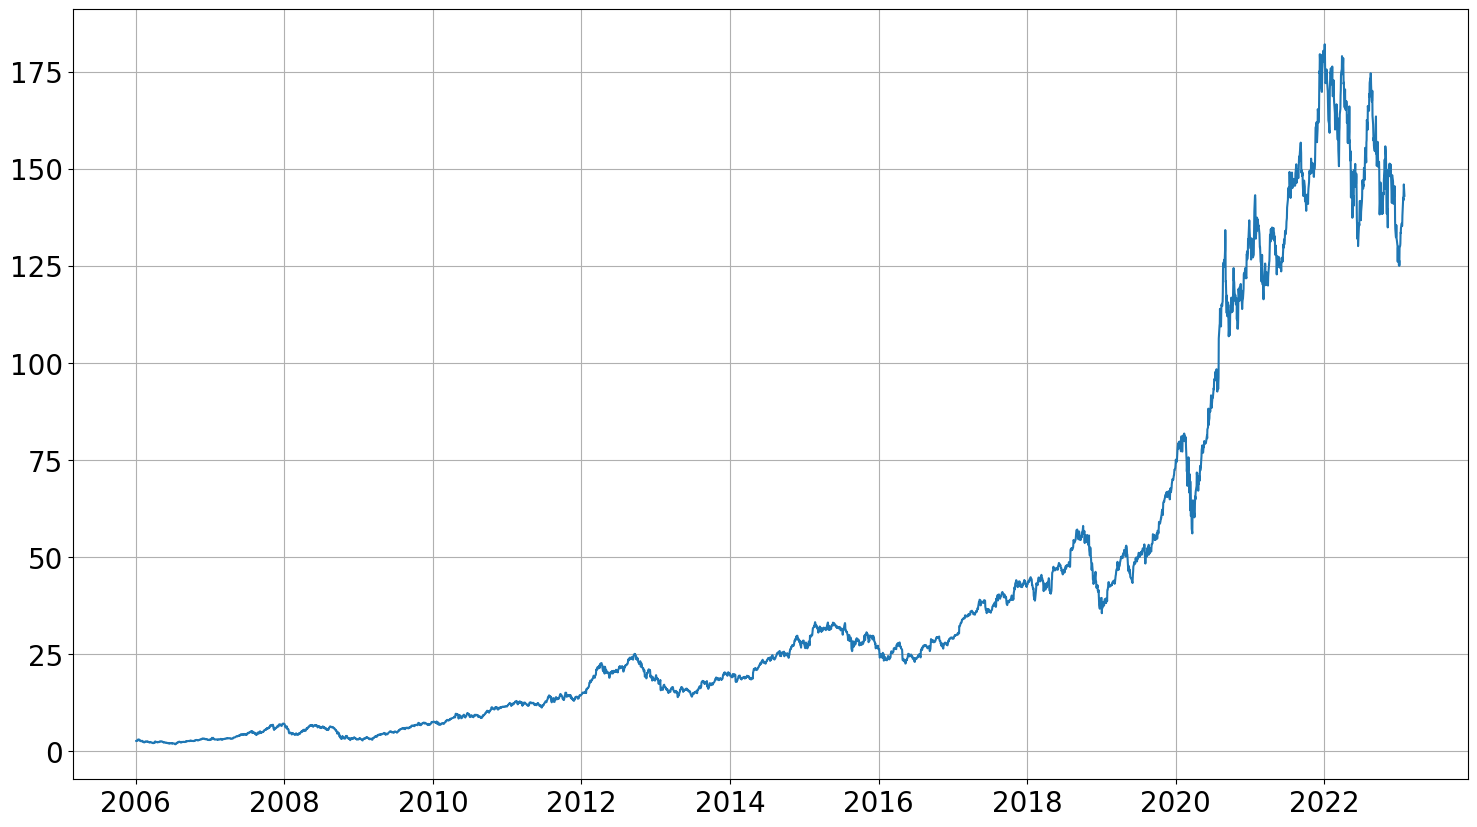

TypeError: Figure.savefig() takes 2 positional arguments but 3 were given

In [19]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 18, 10
plt.rcParams["font.size"] = 20

fig = plt.figure()
plt.plot(arima_model.df['Close'])
plt.grid()
plt.show()

# fig.savefig('00_test_Close_plt', dpi=300)

def save_fig(figure, name, dpi=300):
    figure.savefig(name, dpi)

save_fig(figure=fig, name='01_test_Close_plt', dpi=600)

# print(fig.__dict__)

0.6277086614173228

In [5]:
apple_ticket.df.loc[apple_ticket.df.index.year==2022, 'Close']

Date
2022-01-03    182.009995
2022-01-04    179.699997
2022-01-05    174.919998
2022-01-06    172.000000
2022-01-07    172.169998
                 ...    
2022-12-23    131.860001
2022-12-27    130.029999
2022-12-28    126.040001
2022-12-29    129.610001
2022-12-30    129.929993
Name: Close, Length: 251, dtype: float64

In [33]:
apple_ticket.df[(apple_ticket.df.index.year==2022) | (apple_ticket.df.index.year==2023)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.959747,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663086,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910645,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007523,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176514,86709100
...,...,...,...,...,...,...
2023-01-24,140.309998,143.160004,140.300003,142.529999,142.529999,66435100
2023-01-25,140.889999,142.429993,138.809998,141.860001,141.860001,65799300
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.960007,54105100


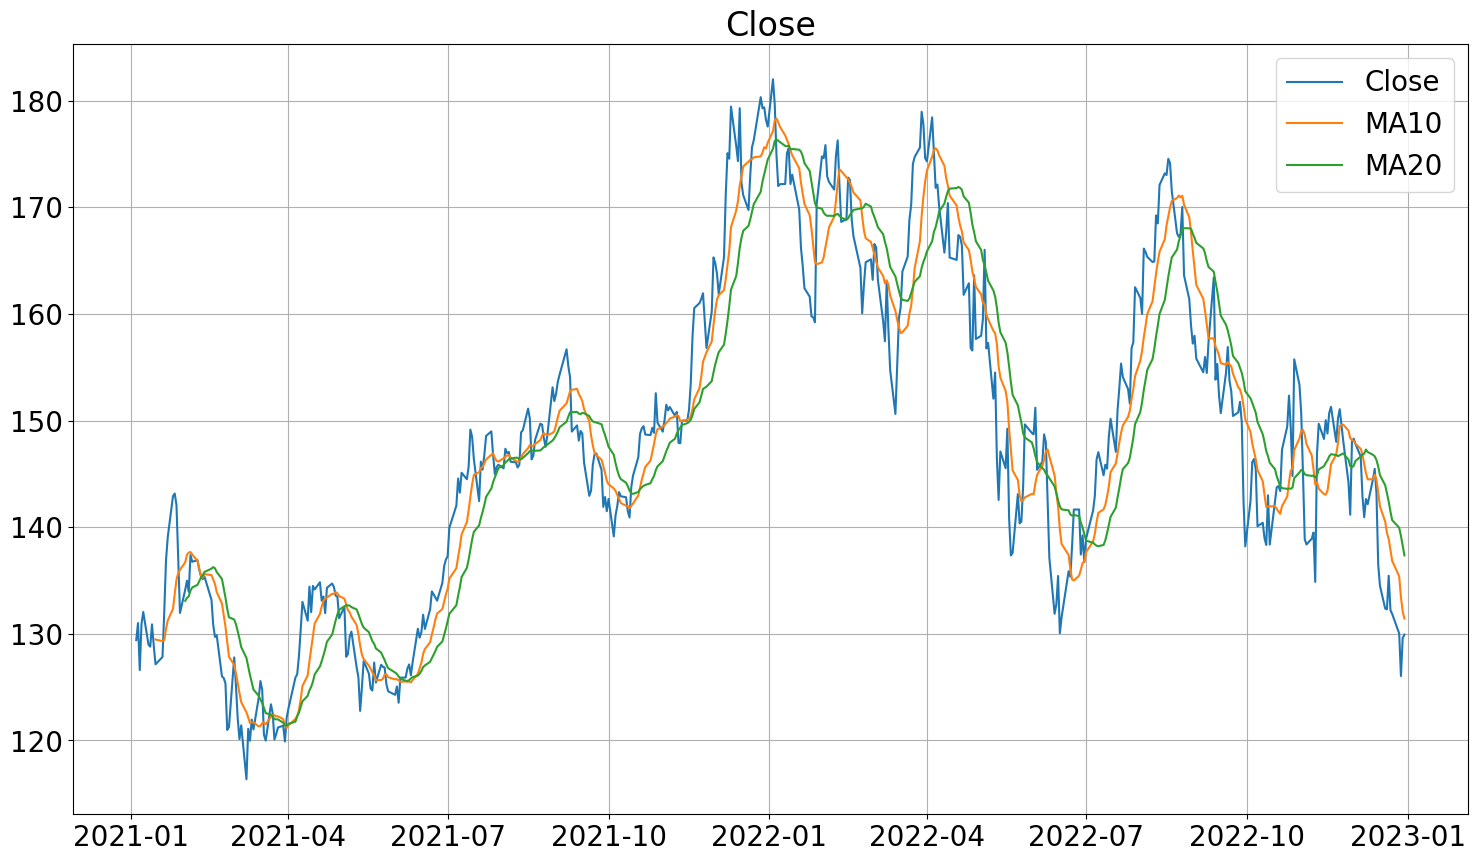

In [36]:
mask = (apple_ticket.df.index.year==2021) | (apple_ticket.df.index.year==2022)

apple_ticket.plt_mas(apple_ticket.df.loc[mask, 'Close'], 
                     ma_list=(10, 20), 
                     graph_name='Close')

In [6]:
apple_ticket.plt_mas(column_name='Close', ma_list=(10, 50, 100))

TypeError: StockPrices.plt_mas() got an unexpected keyword argument 'column_name'

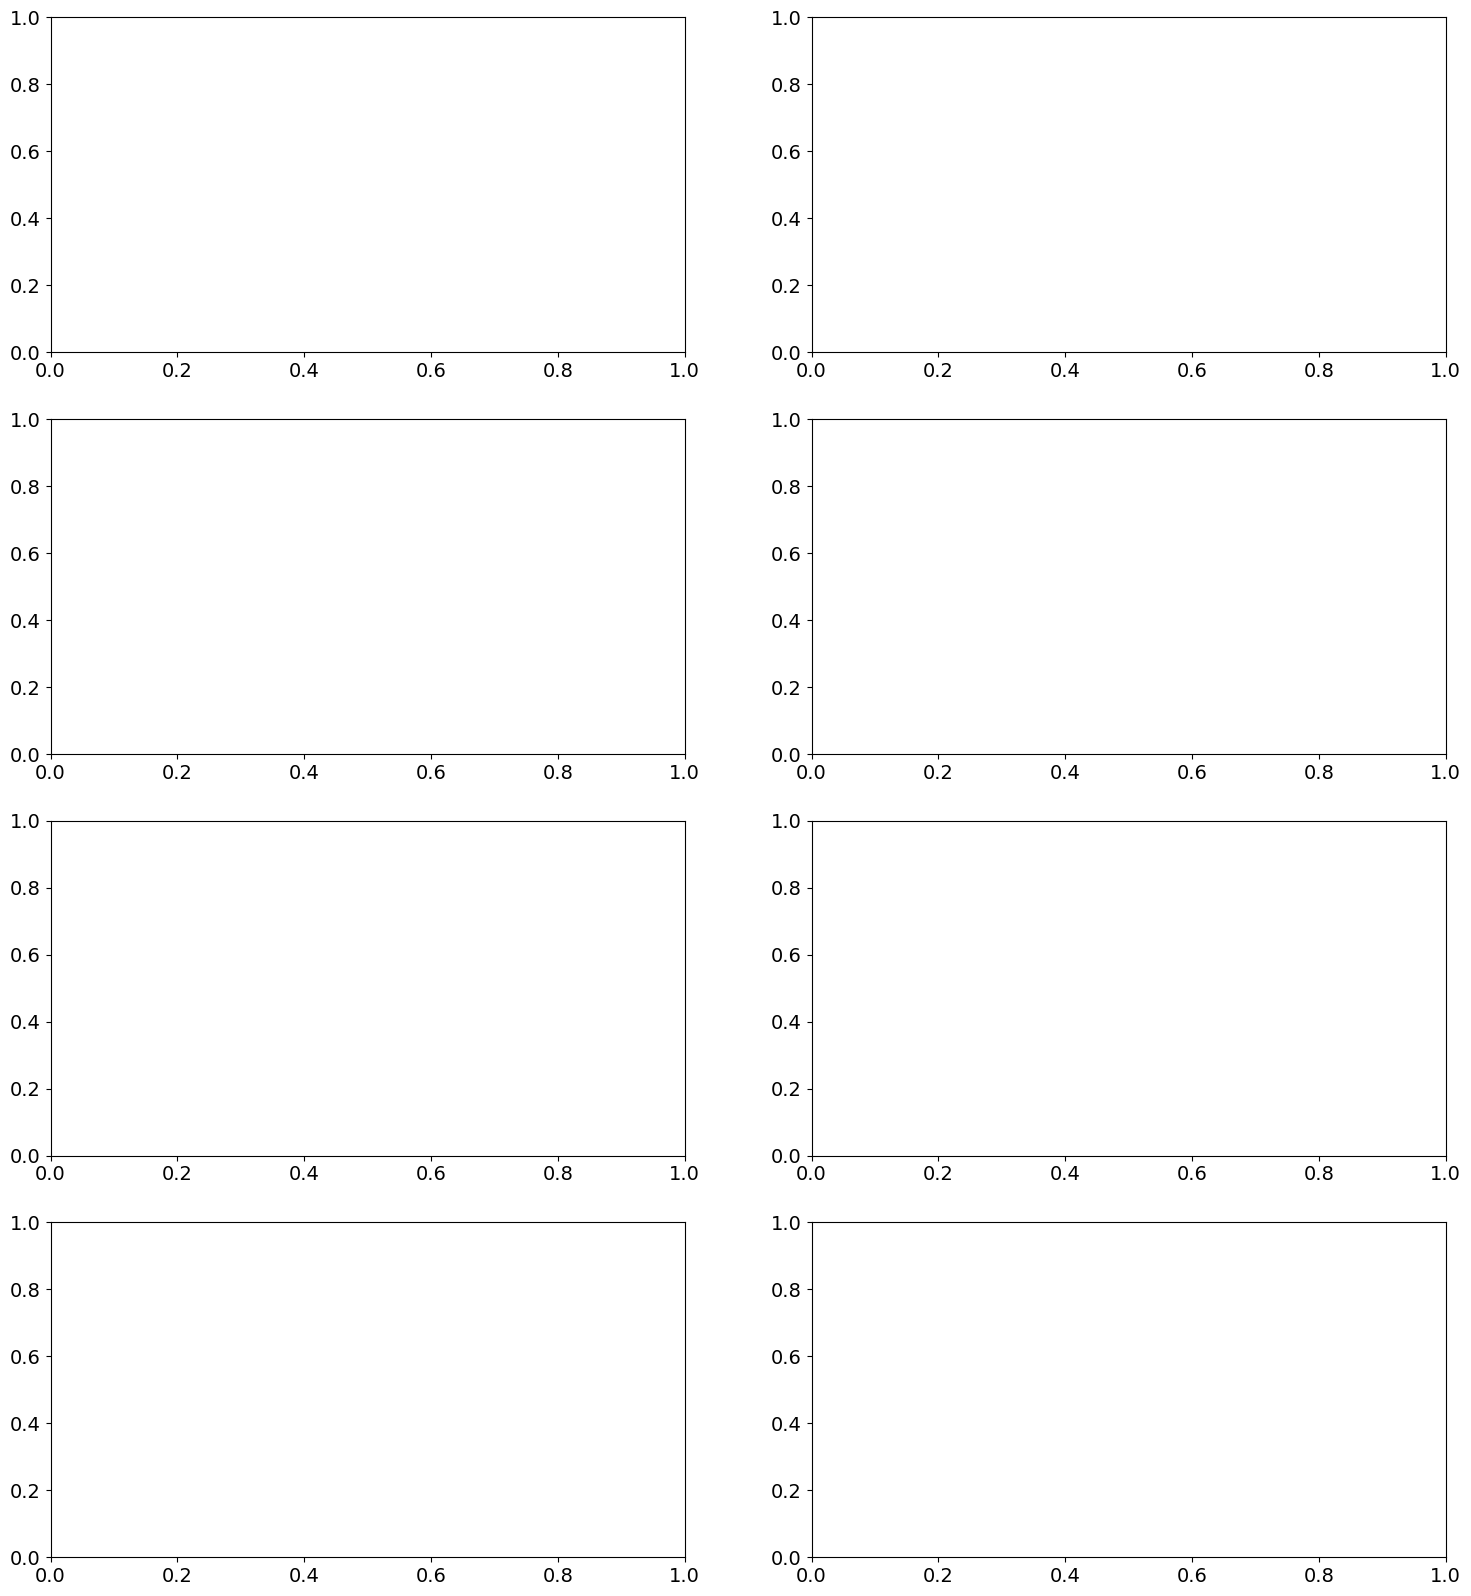

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(len(ma_list), 2)

In [14]:
for i, (train_num, test_num) in enumerate(apple_ticket.train_test_groups):
    print(f'Fold {i}')
    print(f"Train: {train_num}")
    print(f"Test: {test_num}")

Fold 0
Train: [   0    1    2 ... 1795 1796 1797]
Test: [1798 1799 1800 1801 1802]
Fold 1
Train: [   0    1    2 ... 1800 1801 1802]
Test: [1803 1804 1805 1806 1807]
Fold 2
Train: [   0    1    2 ... 1805 1806 1807]
Test: [1808 1809 1810 1811 1812]
Fold 3
Train: [   0    1    2 ... 1810 1811 1812]
Test: [1813 1814 1815 1816 1817]
Fold 4
Train: [   0    1    2 ... 1815 1816 1817]
Test: [1818 1819 1820 1821 1822]
Fold 5
Train: [   0    1    2 ... 1820 1821 1822]
Test: [1823 1824 1825 1826 1827]
Fold 6
Train: [   0    1    2 ... 1825 1826 1827]
Test: [1828 1829 1830 1831 1832]
Fold 7
Train: [   0    1    2 ... 1830 1831 1832]
Test: [1833 1834 1835 1836 1837]
Fold 8
Train: [   0    1    2 ... 1835 1836 1837]
Test: [1838 1839 1840 1841 1842]
Fold 9
Train: [   0    1    2 ... 1840 1841 1842]
Test: [1843 1844 1845 1846 1847]
Fold 10
Train: [   0    1    2 ... 1845 1846 1847]
Test: [1848 1849 1850 1851 1852]
Fold 11
Train: [   0    1    2 ... 1850 1851 1852]
Test: [1853 1854 1855 1856 1857]
Fo

In [19]:
next(split_result)

(array([   0,    1,    2, ..., 4265, 4266, 4267]),
 array([4268, 4269, 4270, 4271, 4272, 4273, 4274, 4275, 4276, 4277]))

In [2]:
arima_apple = ModelARIMA(path='data/AAPL_20060101-20230131.csv')

arima_apple.prep()

(4298, 6)

In [3]:
arima_apple.df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,2.585000,2.669643,2.580357,2.669643,2.275651,807234400
2006-01-04,2.683214,2.713571,2.660714,2.677500,2.282349,619603600
2006-01-05,2.672500,2.675000,2.633929,2.656429,2.264388,449422400
2006-01-06,2.687500,2.739286,2.662500,2.725000,2.322838,704457600
2006-01-09,2.740357,2.757143,2.705000,2.716071,2.315227,675040800
...,...,...,...,...,...,...
2023-01-24,140.309998,143.160004,140.300003,142.529999,142.529999,66435100
2023-01-25,140.889999,142.429993,138.809998,141.860001,141.860001,65799300
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.960007,54105100


In [3]:
arima_apple.ma('Close', wind=50)
arima_apple.df

,Open,High,Low,Close,Adj Close,Volume,Close_ma50
Date,,,,,,,
2006-01-03,2.585000,2.669643,2.580357,2.669643,2.275651,807234400,NaN
2006-01-04,2.683214,2.713571,2.660714,2.677500,2.282349,619603600,NaN
2006-01-05,2.672500,2.675000,2.633929,2.656429,2.264388,449422400,NaN
2006-01-06,2.687500,2.739286,2.662500,2.725000,2.322838,704457600,NaN
2006-01-09,2.740357,2.757143,2.705000,2.716071,2.315227,675040800,NaN
...,...,...,...,...,...,...,...
2023-01-24,140.309998,143.160004,140.300003,142.529999,142.529999,66435100,139.368599
2023-01-25,140.889999,142.429993,138.809998,141.860001,141.860001,65799300,139.268399
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.960007,54105100,139.153600


Hi


In [5]:
apple_ticket.diff_column('Close')

NameError: name 'apple_ticket' is not defined

In [5]:
apple_ticket.log_column('Close')

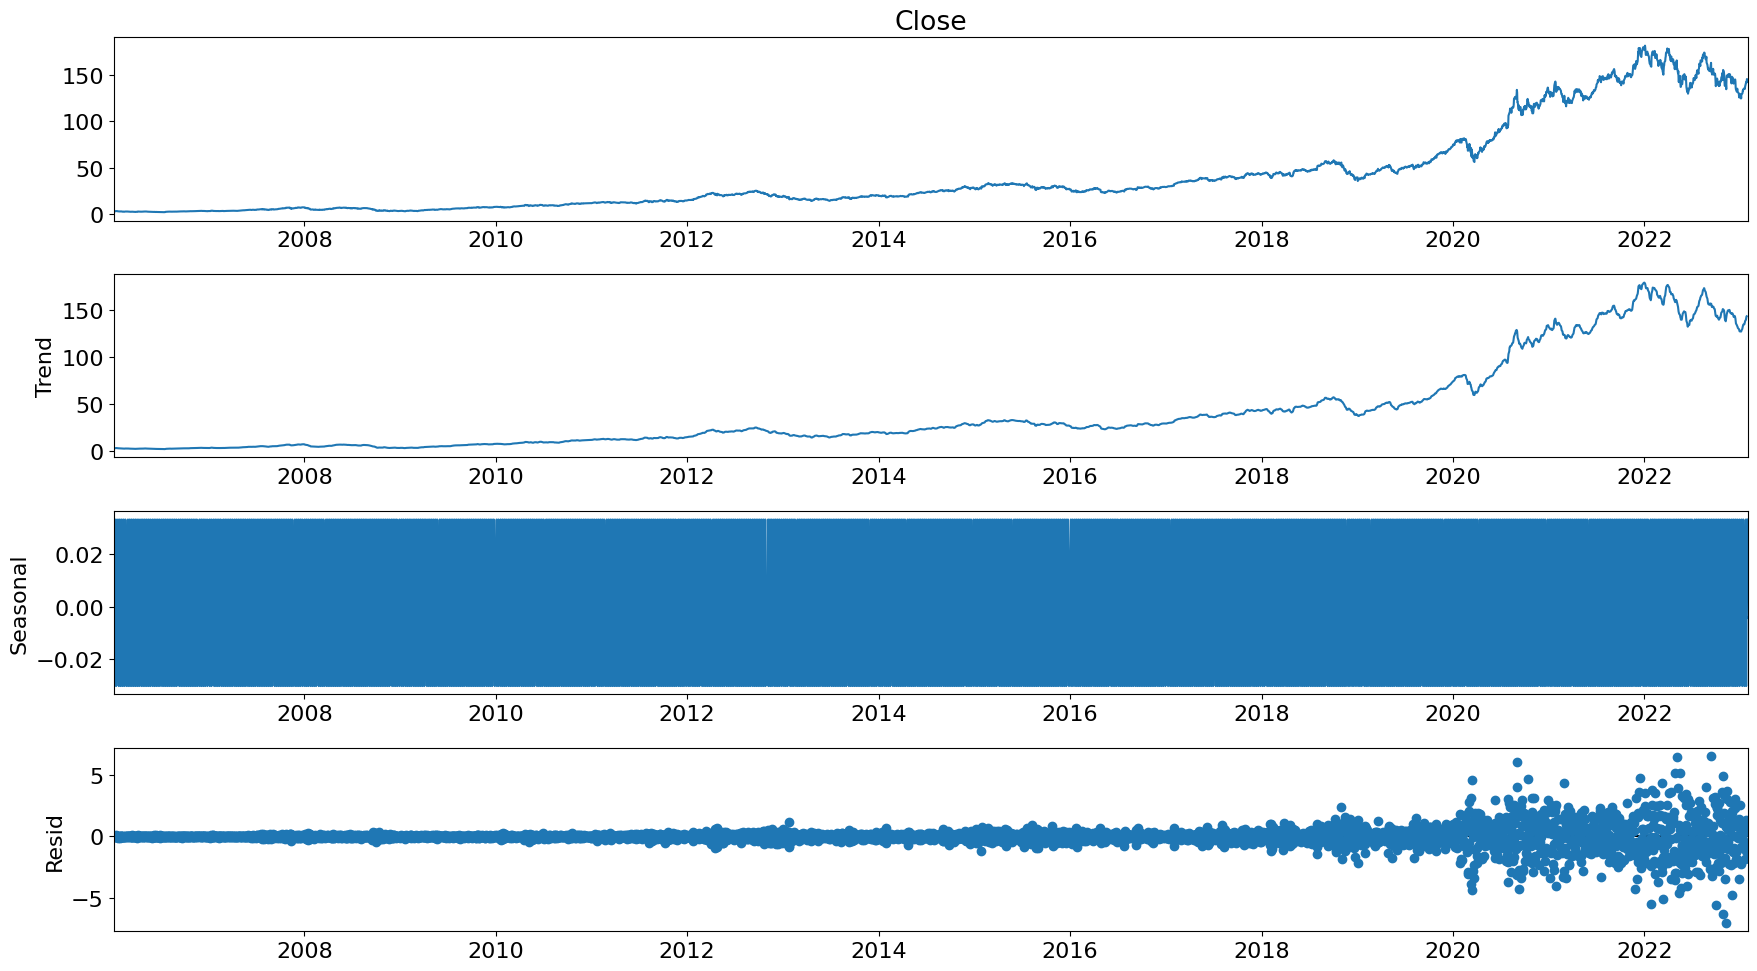

In [6]:
apple_ticket.seasonal_decomp('Close')

In [8]:
if apple_ticket.df.iloc[:100] is not None:
    print('pandas.core.frame.DataFrame')

pandas.core.frame.DataFrame


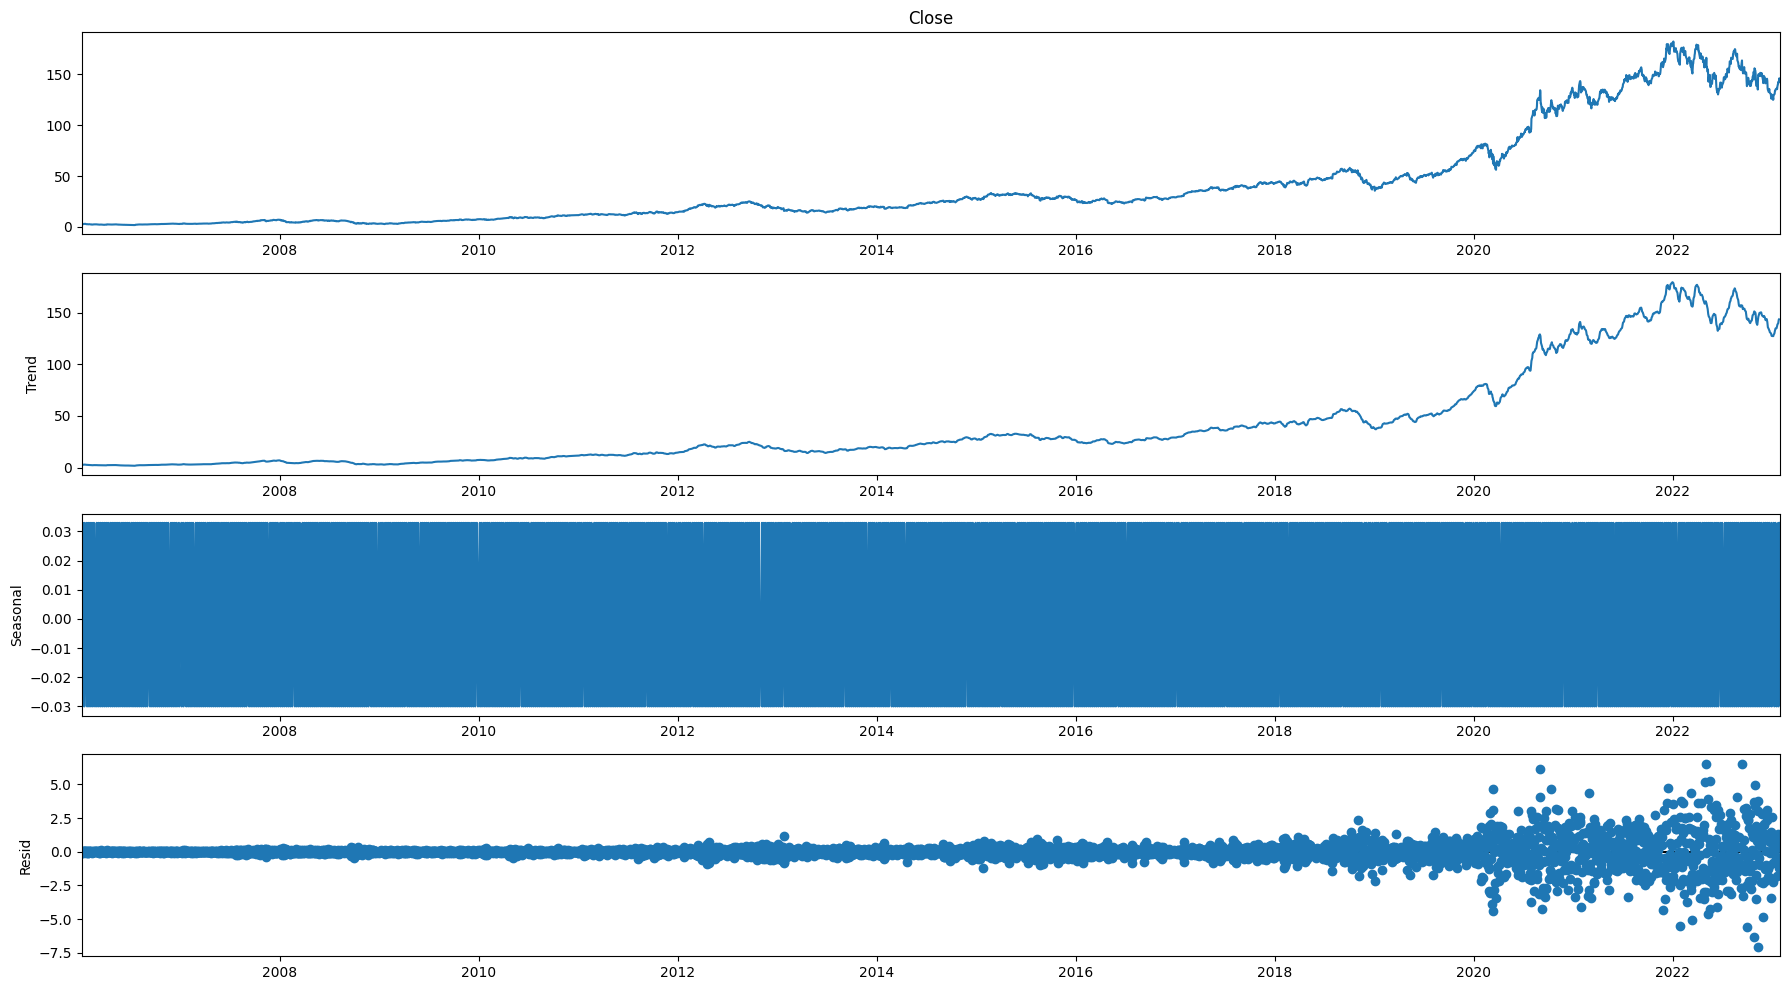

In [6]:
res = apple_ticket.seasonal_decompose('Close', 5)

In [7]:
res.seasonal

Date
2006-01-03   -0.004413
2006-01-04    0.005351
2006-01-05    0.032953
2006-01-06   -0.030046
2006-01-09   -0.003845
                ...   
2023-01-24   -0.030046
2023-01-25   -0.003845
2023-01-26   -0.004413
2023-01-27    0.005351
2023-01-30    0.032953
Name: seasonal, Length: 4298, dtype: float64

In [ ]:
 -0.798635510	 0.601815023	 0.000000000
-0.230304639	 -0.305624578	 0.923879533
 0.556004582	 0.737843002	 0.382683432

In [4]:
import numpy as np

xyz_mat = np.array([[-0.798635510, 0.601815023, 0.000000000], 
                    [-0.230304639, -0.305624578, 0.923879533], 
                    [0.556004582, 0.737843002, 0.382683432]])

xyz_mat

array([[-0.79863551,  0.60181502,  0.        ],
       [-0.23030464, -0.30562458,  0.92387953],
       [ 0.55600458,  0.737843  ,  0.38268343]])

In [7]:
xyz_zero = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
xyz_zero

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [11]:
sum(xyz_mat[0] * xyz_zero[0])

C:\Users\b.ostreshko\AppData\Local\Temp\ipykernel_14836\186789687.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sum(xyz_mat[0] * xyz_zero[0]))


nan

In [12]:
for i in range(xyz_mat.shape[0]):
    np.sqrt( sum(xyz_mat[i] * xyz_mat[i] ))

0.9999999998707253

In [13]:
xyz_mat.shape

(3, 3)